# Name - Aditi Sharma
# Task 1 - Iris Flowers Classification ML Project
# Data Science Intern at Lets Grow More
# Aim - To identify different species Iris Setosa, Iris Versicolour, Iris Virginica
###   Attribute Information:	
###     1. sepal length in cm	
###     2. sepal width in cm	
###     3. petal length in cm	
###     4. petal width in cm	

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("iris.csv")
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.columns = ["sepal length", "sepal width", "petal length", "petal width", "Class"]
df.head()

,sepal length,sepal width,petal length,petal width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   Class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
df.isnull().sum()     #To check for null values

sepal length    0
sepal width     0
petal length    0
petal width     0
Class           0
dtype: int64

In [7]:
df.value_counts()      #returns a Series containing the counts of unique values.

sepal length  sepal width  petal length  petal width  Class          
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
6.2           3.4          5.4           2.3          Iris-virginica     1
6.3           2.3          4.4           1.3          Iris-versicolor    1
              2.5          4.9           1.5          Iris-versicolor    1
                                                                        ..
5.5           2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
              2.6          4.4           1.2          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 146, dtype: int64

# Visualizations -  Seaborn

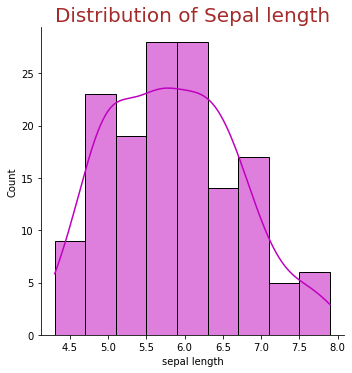

In [8]:
sns.displot(df['sepal length'],kde=True, color="m")
plt.title("Distribution of Sepal length", fontsize=20, color = 'Brown')
plt.show()

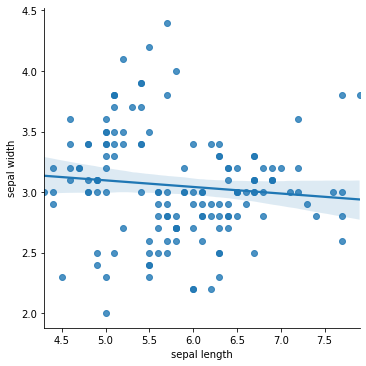

In [9]:
sns.lmplot(x='sepal length',y='sepal width',data=df)  #line+scatter graph

<AxesSubplot:xlabel='Class', ylabel='petal width'>

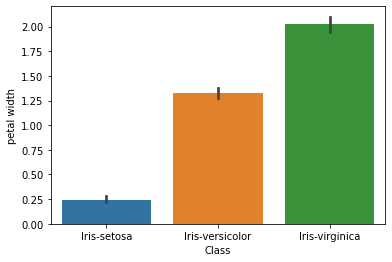

In [10]:
sns.barplot(x='Class',y='petal width',data=df)

<AxesSubplot:xlabel='Class', ylabel='sepal length'>

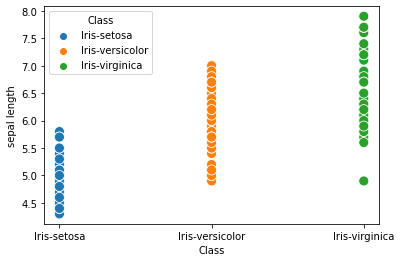

In [11]:
sns.scatterplot(x='Class', y='sepal length',s = 100, data=df , hue="Class")

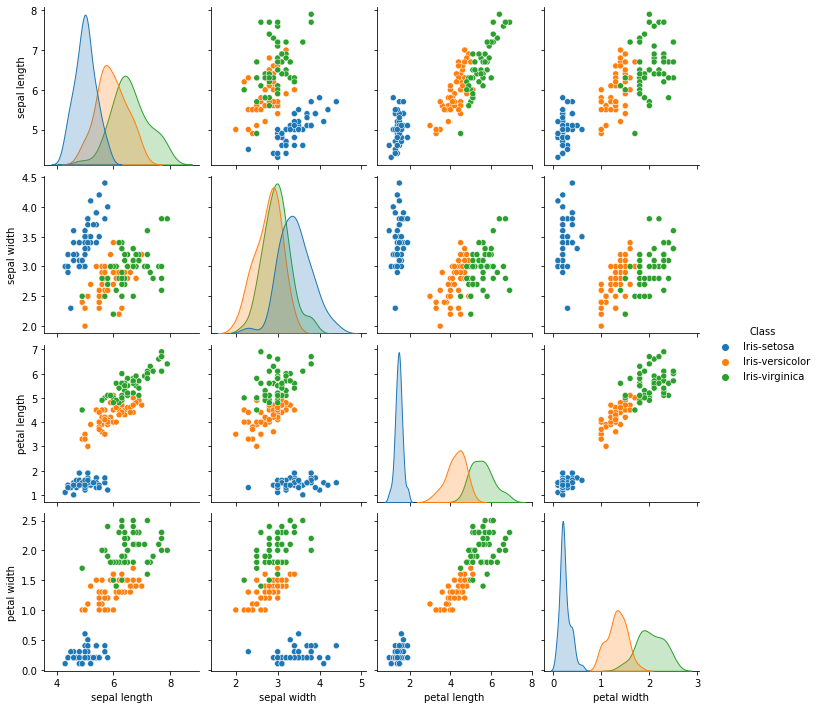

In [12]:
sns.pairplot(df, hue ='Class')

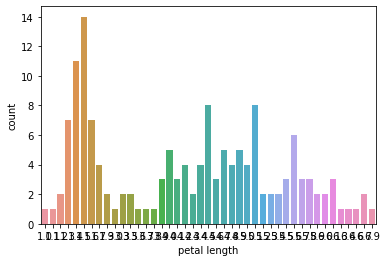

In [13]:
sns.countplot(x='petal length',data=df)
plt.style.use("dark_background")

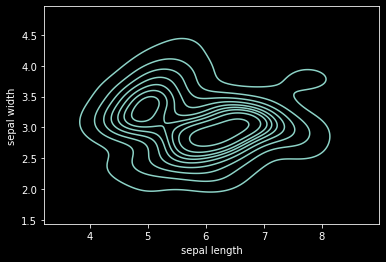

In [14]:
sns.kdeplot(x='sepal length',y='sepal width',data=df)
plt.style.use("grayscale")

## Data Pre-processing

### Encoding 'Class' Column

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Class'. 
df['Class']= label_encoder.fit_transform(df['Class']) 

df['Class'].unique()

array([0, 1, 2])

### Dividing the dataset 

In [16]:
#  divide the dataset into dependent and independent  features
x = df.iloc[: , 0:4]
x.head()

,sepal length,sepal width,petal length,petal width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [17]:
y = df[['Class']]  # 2D
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
144,2
145,2
146,2
147,2


## Splitting dataset into Training and Testing 

In [18]:
# train-test split
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split (x, y, test_size = .20,random_state=0)
print("Size of x_train is",x_train.shape)
print("Size of y_train is",y_train.shape)
print("Size of x_test is",x_test.shape)
print("Size of y_test is",y_test.shape)

Size of x_train is (119, 4)
Size of y_train is (119, 1)
Size of x_test is (30, 4)
Size of y_test is (30, 1)


In [20]:
x_train

,sepal length,sepal width,petal length,petal width
27,5.2,3.4,1.4,0.2
97,5.1,2.5,3.0,1.1
96,6.2,2.9,4.3,1.3
69,5.9,3.2,4.8,1.8
18,5.1,3.8,1.5,0.3
...,...,...,...,...
9,5.4,3.7,1.5,0.2
103,6.5,3.0,5.8,2.2
67,6.2,2.2,4.5,1.5
117,7.7,2.6,6.9,2.3


## Supervised Machine Learning Models

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=1000) 
lgr.fit (x_train, y_train.values.ravel())

# Predict the values 

prediction = lgr.predict (x_test)
print(prediction)

[2 2 1 1 0 2 2 1 1 1 0 0 1 0 0 1 2 1 0 0 0 0 1 0 1 1 1 0 0 2]


In [22]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (y_test, prediction)
confusionMatrix

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  6]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score

print("Accuracy is",accuracy_score(y_test, prediction))

Accuracy is 0.9333333333333333


## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train.values.ravel())

y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy is",accuracy_score(y_test, y_pred))

Accuracy is 0.9333333333333333


In [36]:
# confusion matrix to evaluate performance of data
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (y_test, y_pred)
values = ["Iris-setosa" , "Iris-versicolor", "Iris-virginica"]
confusionMatrix_eval = pd.DataFrame(confusionMatrix, columns = values, index = values)
confusionMatrix_eval

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,12,0,0
Iris-versicolor,0,10,0
Iris-virginica,0,2,6


## Decision Tree

In [50]:
from sklearn import tree
D_tree = tree.DecisionTreeClassifier()
D_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
pred_tree = D_tree.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test, pred_tree)*100

In [46]:
print("Accuracy is", accuracy)

Accuracy is 90.0
